# BITCOIN PRICE PREDICTION 

## 1. Import Libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

## 2. Load Data

In [4]:

# Load your Bitcoin price dataset
data = pd.read_excel ("C://Users//senap//OneDrive//Desktop//btcNewsToPrice.xlsx") 

In [5]:
data.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_13,top_14,top_15,top_16,top_17,top_18,price,open,high,low
0,2015-07-01,Australia Plays Centralized Role in Banning Mo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.6,264.1,265.0,254.4
1,2015-07-02,Digital Technology to Exponentially Disrupt Bu...,Bitcoin Is A Better Way of Transferring Value ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,254.9,257.6,261.3,253.1
2,2015-07-03,How Will Credit Work in a Bitcoin Economy?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,255.4,254.9,256.7,252.4
3,2015-07-04,Improper Network Block Validation Leads to Adv...,MasterCard Tests Facial Recognition Technology...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,260.5,255.4,261.1,253.4
4,2015-07-05,"Bitcoin Documentaries Are Oudated, Time to Tak...","Global Arena Holding, Inc to Acquire Blockchai...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,270.1,260.5,274.1,257.6


In [6]:
data.tail()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_13,top_14,top_15,top_16,top_17,top_18,price,open,high,low
2164,2021-06-08,British Asset Manager Ruffer Bags $1.1 Billion...,Deutsche Bank Warns: Ignoring Rising US Inflat...,White House Tech Advisor Tim Wu Keeps at Least...,Celebrating Uplandâ€™s Genesis Week With a Big...,Solana Aims to Raise $450 Million to Battle Et...,Polkadotâ€™s Parachain Vision Materializes Fol...,Kenyan Banks Warn Clients Against Crypto Trading,Alternative 401(k) Product Offers In-Plan Cryp...,Scammers Pick Bank Transfers Over Cryptocurren...,...,Asset Managers Could Violate Fiduciary Duty If...,FBI Agent Recovers Private Key to $2.3M in Bit...,Two-Fifths of Australian Millennials Prefer Cr...,"El Salvador Offers No Capital Gains Tax, Perma...",While China's Bitcoin Miners Flock to Central ...,US Senators Call for Increased Measures to Reg...,33382.9,33574.6,34047.8,31158.1
2165,2021-06-09,Report: Document Shows Specific Bitcoin Miners...,Mystery Whale Returns by Moving $35 Million â€...,Hong Kong to Connect Digital Yuan With Domesti...,Uganda Museum Collaborates With Software Devel...,Crypto Payments App Bottlepay Is Now Available...,NYAG Court Order to Shut Down Coinseed Succeed...,El Salvador Bitcoin Law Making BTC Legal Tende...,Grand Theft Auto 6 to Feature a Fictional Cryp...,Mike Novogratz: Bitcoin Investors Waiting for ...,...,Amazon Job Listing Seeks Blockchain Lead - Int...,IRS Seeks Congressional Authority to Obtain Da...,Skybridge Capital Says Bitcoin Still Has More ...,NaN,NaN,NaN,37332.2,33385.5,37517.6,32428.6
2166,2021-06-10,"China Arrests 1,100 People Allegedly Using Cry...",XCarnival Secures $2 Million Seed Investment,El Salvador to Mine Bitcoin With Energy From V...,Major Cryptocurrency Exchanges Explore Enterin...,Funding Roundup: Innovative Projects Attract B...,Doge in Brooklyn: A Local Apparel Store Starts...,Concordium Debuts its Business-Oriented Blockc...,â€˜All Banks Go Fintechâ€™: Hong Kong Unveils ...,China's Qinghai Province Instructs Bitcoin Min...,...,Iran's President Wants Crypto 'Laws and Instru...,Commodity Strategist Mike McGlone Says $40K BT...,Interactive Brokers to Launch Cryptocurrency T...,NaN,NaN,NaN,36649.4,37375.2,38340.8,35824.0
2167,2021-06-11,Texas Senator Claims People Are Flocking to Bi...,"Swiss, French Central Banks to Trial Wholesale...",NFT Roundup: Hoard Exchangeâ€™s New Marketplac...,Russian Court Bans Websites Explaining How to ...,BarterTrade V2 Launches With Advanced Social T...,Ultra-Exclusive Surfside Penthouse in Miami Se...,Spain Prepares for Tax Returns Season With Cry...,Bitcoin Mining Firm Hut 8 Approved to List on ...,IMF Voices Concerns Over El Salvador Making Bi...,...,OVR Using Chainlink to Connect the Metaverse t...,"Iran Seizes 3,000 Crypto Mining Devices in a Week",How Many People Mined BTC Alongside Satoshi? 2...,NaN,NaN,NaN,37314.6,36654.3,37641.1,36003.3
2168,2021-06-12,Kraken Weighs in on IPO After Coinbase's Lackl...,Report: Filecoin and Chia Believers in China A...,Speedy Trial Success â€” Bitcoin Upgrade Tapro...,The CBN Says Nigeria Will Have a Digital Curre...,Bank of Namibia Warns Crypto Traders It 'Will ...,Cryptopunk NFT Sold for Almost $12 Million in ...,Wall Street Giants Want to Be Your Landlord - ...,BIS Official Insists Bitcoin Fails Means of Pa...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35467.5,37334.4,37437.3,34703.3


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2169 non-null   datetime64[ns]
 1   top_0   2169 non-null   object        
 2   top_1   2145 non-null   object        
 3   top_2   2043 non-null   object        
 4   top_3   1777 non-null   object        
 5   top_4   1478 non-null   object        
 6   top_5   1192 non-null   object        
 7   top_6   972 non-null    object        
 8   top_7   768 non-null    object        
 9   top_8   622 non-null    object        
 10  top_9   481 non-null    object        
 11  top_10  356 non-null    object        
 12  top_11  220 non-null    object        
 13  top_12  142 non-null    object        
 14  top_13  92 non-null     object        
 15  top_14  57 non-null     object        
 16  top_15  34 non-null     object        
 17  top_16  18 non-null     object        
 18  top_17  

In [8]:
data.describe()

,date,price,open,high,low
count,2169,2169.000000,2169.000000,2169.000000,2169.000000
mean,2018-06-22 23:47:23.153526784,8703.441540,8687.204564,8953.196312,8387.575426
min,2015-07-01 00:00:00,211.400000,211.400000,226.600000,196.300000
25%,2016-12-27 00:00:00,829.200000,827.300000,874.700000,808.600000
50%,2018-06-23 00:00:00,6389.100000,6386.600000,6513.100000,6255.900000
75%,2019-12-18 00:00:00,9585.200000,9580.300000,9773.200000,9343.000000
max,2021-06-12 00:00:00,63540.900000,63544.200000,64778.000000,62067.500000
std,NaN,12154.712336,12142.205973,12544.055708,11667.853971


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2169 entries, 0 to 2168
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2169 non-null   datetime64[ns]
 1   top_0   2169 non-null   object        
 2   top_1   2145 non-null   object        
 3   top_2   2043 non-null   object        
 4   top_3   1777 non-null   object        
 5   top_4   1478 non-null   object        
 6   top_5   1192 non-null   object        
 7   top_6   972 non-null    object        
 8   top_7   768 non-null    object        
 9   top_8   622 non-null    object        
 10  top_9   481 non-null    object        
 11  top_10  356 non-null    object        
 12  top_11  220 non-null    object        
 13  top_12  142 non-null    object        
 14  top_13  92 non-null     object        
 15  top_14  57 non-null     object        
 16  top_15  34 non-null     object        
 17  top_16  18 non-null     object        
 18  top_17  

In [10]:

# Display the first few rows of the dataset
print(data.head())

        date                                              top_0  \
0 2015-07-01  Australia Plays Centralized Role in Banning Mo...   
1 2015-07-02  Digital Technology to Exponentially Disrupt Bu...   
2 2015-07-03         How Will Credit Work in a Bitcoin Economy?   
3 2015-07-04  Improper Network Block Validation Leads to Adv...   
4 2015-07-05  Bitcoin Documentaries Are Oudated, Time to Tak...   

                                               top_1 top_2 top_3 top_4 top_5  \
0                                                NaN   NaN   NaN   NaN   NaN   
1  Bitcoin Is A Better Way of Transferring Value ...   NaN   NaN   NaN   NaN   
2                                                NaN   NaN   NaN   NaN   NaN   
3  MasterCard Tests Facial Recognition Technology...   NaN   NaN   NaN   NaN   
4  Global Arena Holding, Inc to Acquire Blockchai...   NaN   NaN   NaN   NaN   

  top_6 top_7 top_8  ... top_13 top_14 top_15 top_16 top_17 top_18  price  \
0   NaN   NaN   NaN  ...    NaN    NaN 

In [11]:
print(data.columns)

Index(['date', 'top_0', 'top_1', 'top_2', 'top_3', 'top_4', 'top_5', 'top_6',
       'top_7', 'top_8', 'top_9', 'top_10', 'top_11', 'top_12', 'top_13',
       'top_14', 'top_15', 'top_16', 'top_17', 'top_18', 'price', 'open',
       'high', 'low'],
      dtype='object')


## 3. Preprocess Data

In [12]:
# 3. Preprocess Data
# Convert the 'Date' column to datetime if it's not already
data['date'] = pd.to_datetime(data['date'])

In [13]:
# Sort the data by date
data.sort_values('date', inplace=True)

In [14]:
# Create a new dataframe with relevant columns
data = data[['date', 'open']]

### 4. Feature Engineering

In [15]:
# 4. Feature Engineering
# Create features and labels
data['Price_Next_Day'] = data['open'].shift(-1)

In [16]:
# Drop the last row (as it will have NaN in 'Price_Next_Day')
data.dropna(inplace=True)

In [17]:
# Features and labels
X = data[['open']]  
y = data['Price_Next_Day'] 

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Train and Evaluate KNN Model 

In [20]:
# 5. Train and Evaluate KNN Model
# Create the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)

In [21]:
# Train the model
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [22]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)

## Evaluate the model

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 347144443.695199
Mean Absolute Error: 11193.506774193547


## Visualisation 

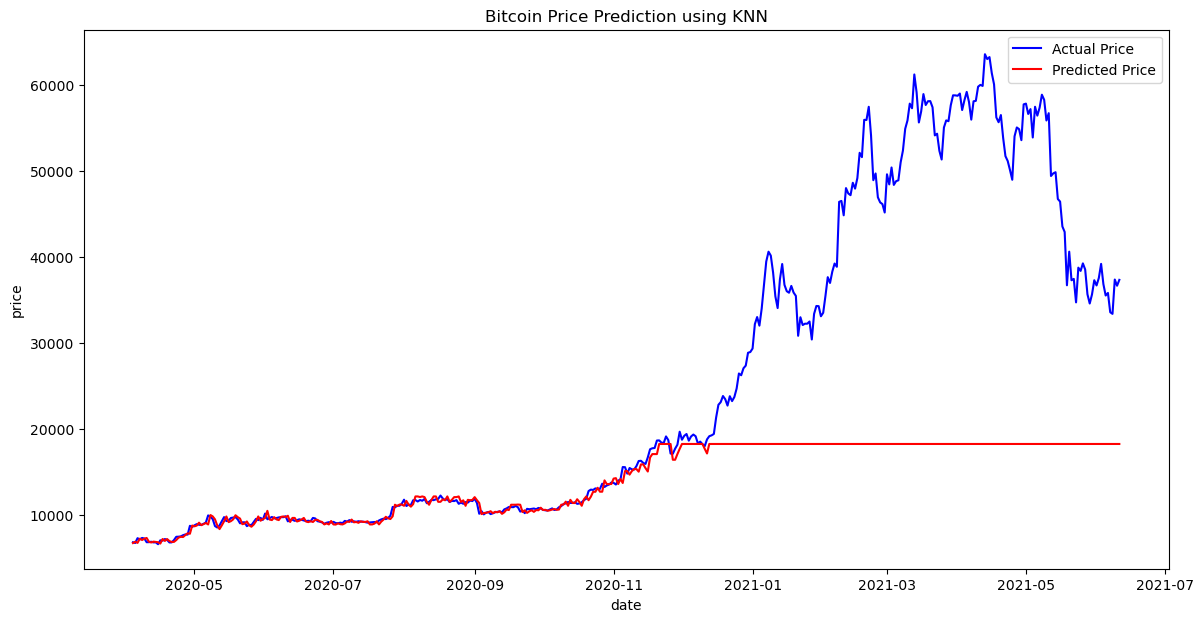

In [24]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(data['date'].iloc[-len(y_test):], y_test, label='Actual Price', color='b')
plt.plot(data['date'].iloc[-len(y_test):], y_pred, label='Predicted Price', color='r')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Bitcoin Price Prediction using KNN')
plt.legend()
plt.show()

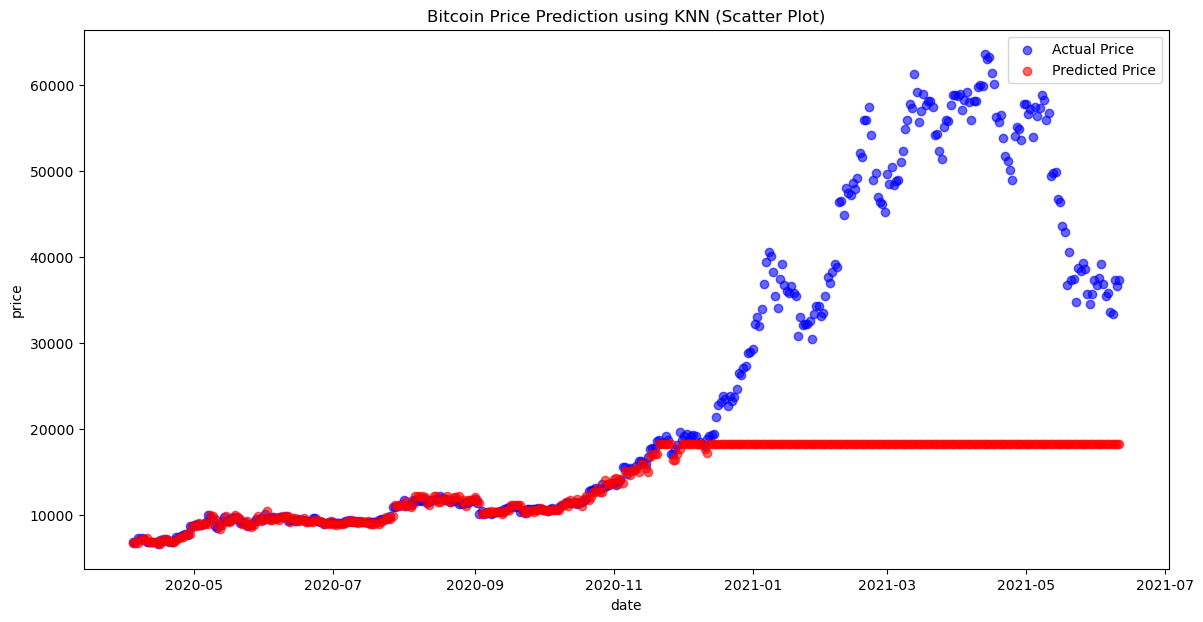

In [25]:

# Scatter Plot
plt.figure(figsize=(14, 7))
plt.scatter(data['date'].iloc[-len(y_test):], y_test, label='Actual Price', color='b', alpha=0.6)
plt.scatter(data['date'].iloc[-len(y_test):], y_pred, label='Predicted Price', color='r', alpha=0.6)
plt.xlabel('date')
plt.ylabel('price')
plt.title('Bitcoin Price Prediction using KNN (Scatter Plot)')
plt.legend()
plt.show()


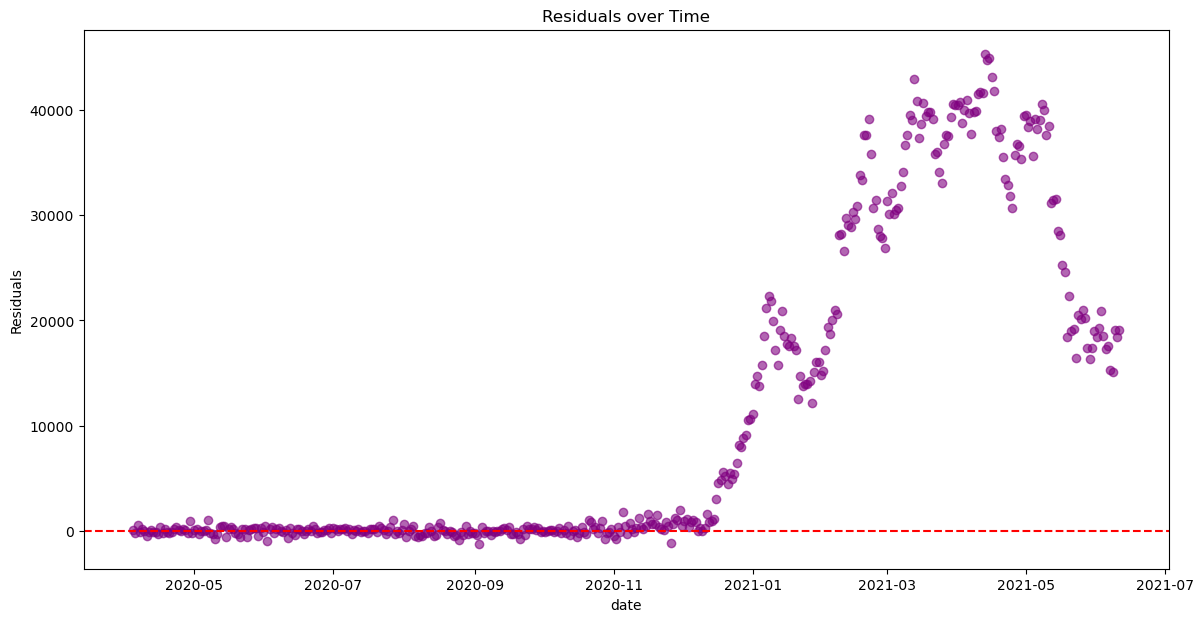

In [26]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(14, 7))
plt.scatter(data['date'].iloc[-len(y_test):], residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('date')
plt.ylabel('Residuals')
plt.title('Residuals over Time')
plt.show()


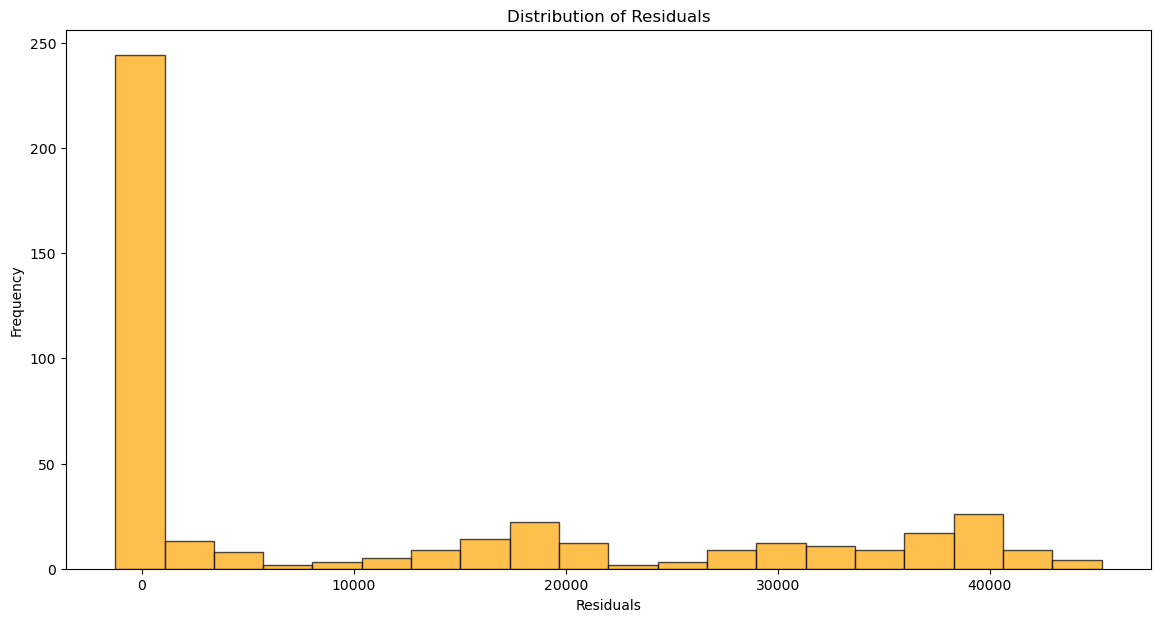

In [27]:
# Histogram of Residuals
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=20, color='orange', edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


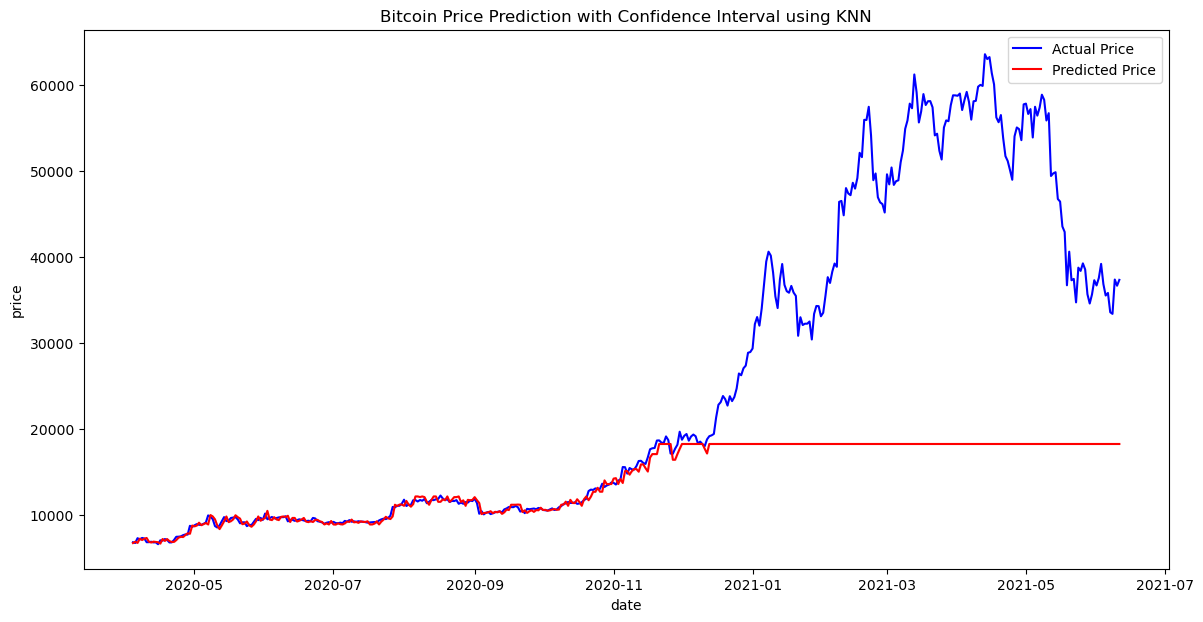

In [28]:
# Line Plot with Confidence Interval
plt.figure(figsize=(14, 7))
plt.plot(data['date'].iloc[-len(y_test):], y_test, label='Actual Price', color='b')
plt.plot(data['date'].iloc[-len(y_test):], y_pred, label='Predicted Price', color='r')
ci = 1.96 * np.std(y_pred)/np.mean(y_pred)
plt.fill_between(data['date'].iloc[-len(y_test):], (y_pred-ci), (y_pred+ci), color='r', alpha=0.1)
plt.xlabel('date')
plt.ylabel('price')
plt.title('Bitcoin Price Prediction with Confidence Interval using KNN')
plt.legend()
plt.show()


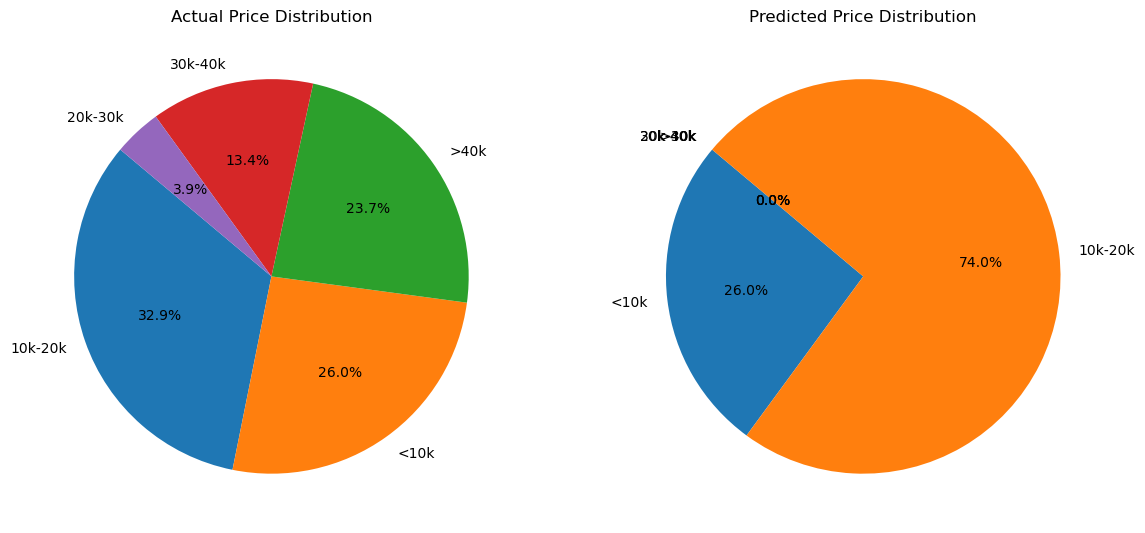

In [29]:
# Categorize Prices
bins = [0, 10000, 20000, 30000, 40000, np.inf]
labels = ['<10k', '10k-20k', '20k-30k', '30k-40k', '>40k']
y_test_bins = pd.cut(y_test, bins=bins, labels=labels)
y_pred_bins = pd.cut(y_pred, bins=bins, labels=labels)

# Count the occurrences in each category
actual_counts = y_test_bins.value_counts()
predicted_counts = y_pred_bins.value_counts()
# Plot Pie Charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
axs[0].pie(actual_counts, labels=actual_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Actual Price Distribution')
axs[1].pie(predicted_counts, labels=predicted_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Predicted Price Distribution')
plt.show()